# Trabalho 7

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

Importando e ajeitando a tabela das amostras

In [ ]:
df = pd.DataFrame( #Criando o dataframe da tabela do slide 11.
    data = {
        'xi': [
        9.45,  7.99,  9.29, 11.66, 12.16, 10.18,  8.04, 11.46,   9.2, 10.34,
        9.03, 11.47, 10.51,   9.4, 10.08,  9.37, 10.62, 10.31,  8.52, 10.84,
        10.9,  9.33, 12.29,  11.5,  10.6, 11.08, 10.38, 11.62, 11.31, 10.52
        ]
    }
)

## Questão 1

Utilizando Python e os dados das colunas i e xi da tabela do slide 11 do material sobre CuSum e EWMA trace o gráfico CuSum do slide 12 e identifique em qual amostra i o processo passou a estar fora de controle.

In [ ]:
def CuSum(df, mu0, mu1, sigma):
  '''Constrói o gráfico de CuSum de um dataframe.'''

  df = pd.DataFrame(data = df) #Armazenando o dataframe.
  mu0 = float(mu0) #Média do processo original.
  mu1 = float(mu1) #Média do processo alterada.
  sigma = float(sigma) #Desvio padrão do processo.
  K = 5 * sigma
  SMais = 0
  SMenos = 0
  NMais = 0 #Variável que conta o número consecutivo de períodos em que SMais > 0.
  NMenos = 0 #Variável que conta o número consecutivo de períodos em que SMenos > 0.
  D = abs(mu1 - mu0)/2

  #ADICIONANDO COLUNAS NO DATAFRAME:
  df.columns = ['xi'] #Renomeia a coluna.
  df.insert(loc = 0, column = 'i', value = range(1, len(df) + 1)) # Preenche a coluna i com números de 1 até 30.
  df['Si+'] = pd.Series(float) #Cria uma coluna com valores NaN.
  df['N+'] = pd.Series(int)
  df['Si-'] = pd.Series(float)
  df['N-'] = pd.Series(int)

  #ESTRUTURA PARA PREENCHER AS COLUNAS-RECÉM CRIADAS:
  i = 0  #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    SMais = max(SMais + df.loc[i, 'xi'] - mu0 - D, 0)
    SMenos = max(SMenos - df.loc[i, 'xi'] + mu0 - D, 0)
    if SMais > 0:
      NMais += 1
    else:
      NMais = 0
    if SMenos > 0:
      NMenos += 1
    else:
      NMenos = 0
    df.loc[i, 'Si+'] = SMais
    df.loc[i, 'N+'] = NMais
    df.loc[i, 'Si-'] = SMenos
    df.loc[i, 'N-'] = NMenos
    i += 1

  #ESTRUTURA DE ITERAÇÃO PARA ENCONTRAR A AMOSTRA i ONDE OCORREU O DESCONTROLE DO PROCESSO E CALCULAR O MU CHAPÉU:
  i = 0
  while i < len(df):
    if df.loc[i, 'Si+'] > K:
      descontrole = 'Amostra ' + str(df.loc[i - df.loc[i, 'N+'], 'i']) #Armazena o valor i da amostra onde ocorreu o descontrole do processo.
      mu_chapeu = mu0 + D + df.loc[i, 'Si+'] / df.loc[i, 'N+'] #Calcula o valor da média alterada estimada.
      i = len(df) #Para assim sair da iteração quando for identificado o descontrole.
    elif df.loc[i, 'Si-'] > K:
      descontrole = 'Amostra ' + str(df.loc[i - df.loc[i, 'N-'], 'i'])
      mu_chapeu = mu0 - D - df.loc[i, 'Si-'] / df.loc[i, 'N-']
      i = len(df)
    else:
      descontrole = 0 #Ou seja, não ocorreu descontrole do processo para nenhuma amostra.
    i += 1

  # CONSTRUINDO O GRÁFICO DE CUSUM:
  
  plt.plot(range(1, len(df) + 1),  df['Si+'], color = 'blue', linewidth = 2, marker = 'o', markerfacecolor = 'blue' , markersize = 5)
  plt.plot(range(1, len(df) + 1),  df['Si-'], color = 'red', linewidth = 2, marker = 's', markerfacecolor = 'red' , markersize = 5)
  plt.legend(['$S_{i}^{+}$', '$S_{i}^{-}$'], loc = 'best', bbox_to_anchor=(1.2, 0.3))
  plt.grid(True)
  plt.title(
    "Gráfico CuSum",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel( # Adiciona um título para o eixo horizontal.
    "i",
    fontdict = {
      'family':'DejaVu Sans', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  ) 
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    "$S_{i}$",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_CuSum.png', format='png', dpi=300, bbox_inches='tight')
  plt.close()
  
  graficoCuSum = Image.open('Gráfico_CuSum.png') #Armazena o gráfico de S em uma variável.

  return {
    'Dataframe': df,
    'Descontrole': descontrole,
    'Média Alterada': mu_chapeu,
    'Gráfico': graficoCuSum
  }

CuSum = CuSum(df = df['xi'], mu0 = 10, mu1 = 11, sigma = 1)
CuSum['Descontrole'] #Retornará a amostra onde ocorreu o descontrole do processo.

'Amostra 22'

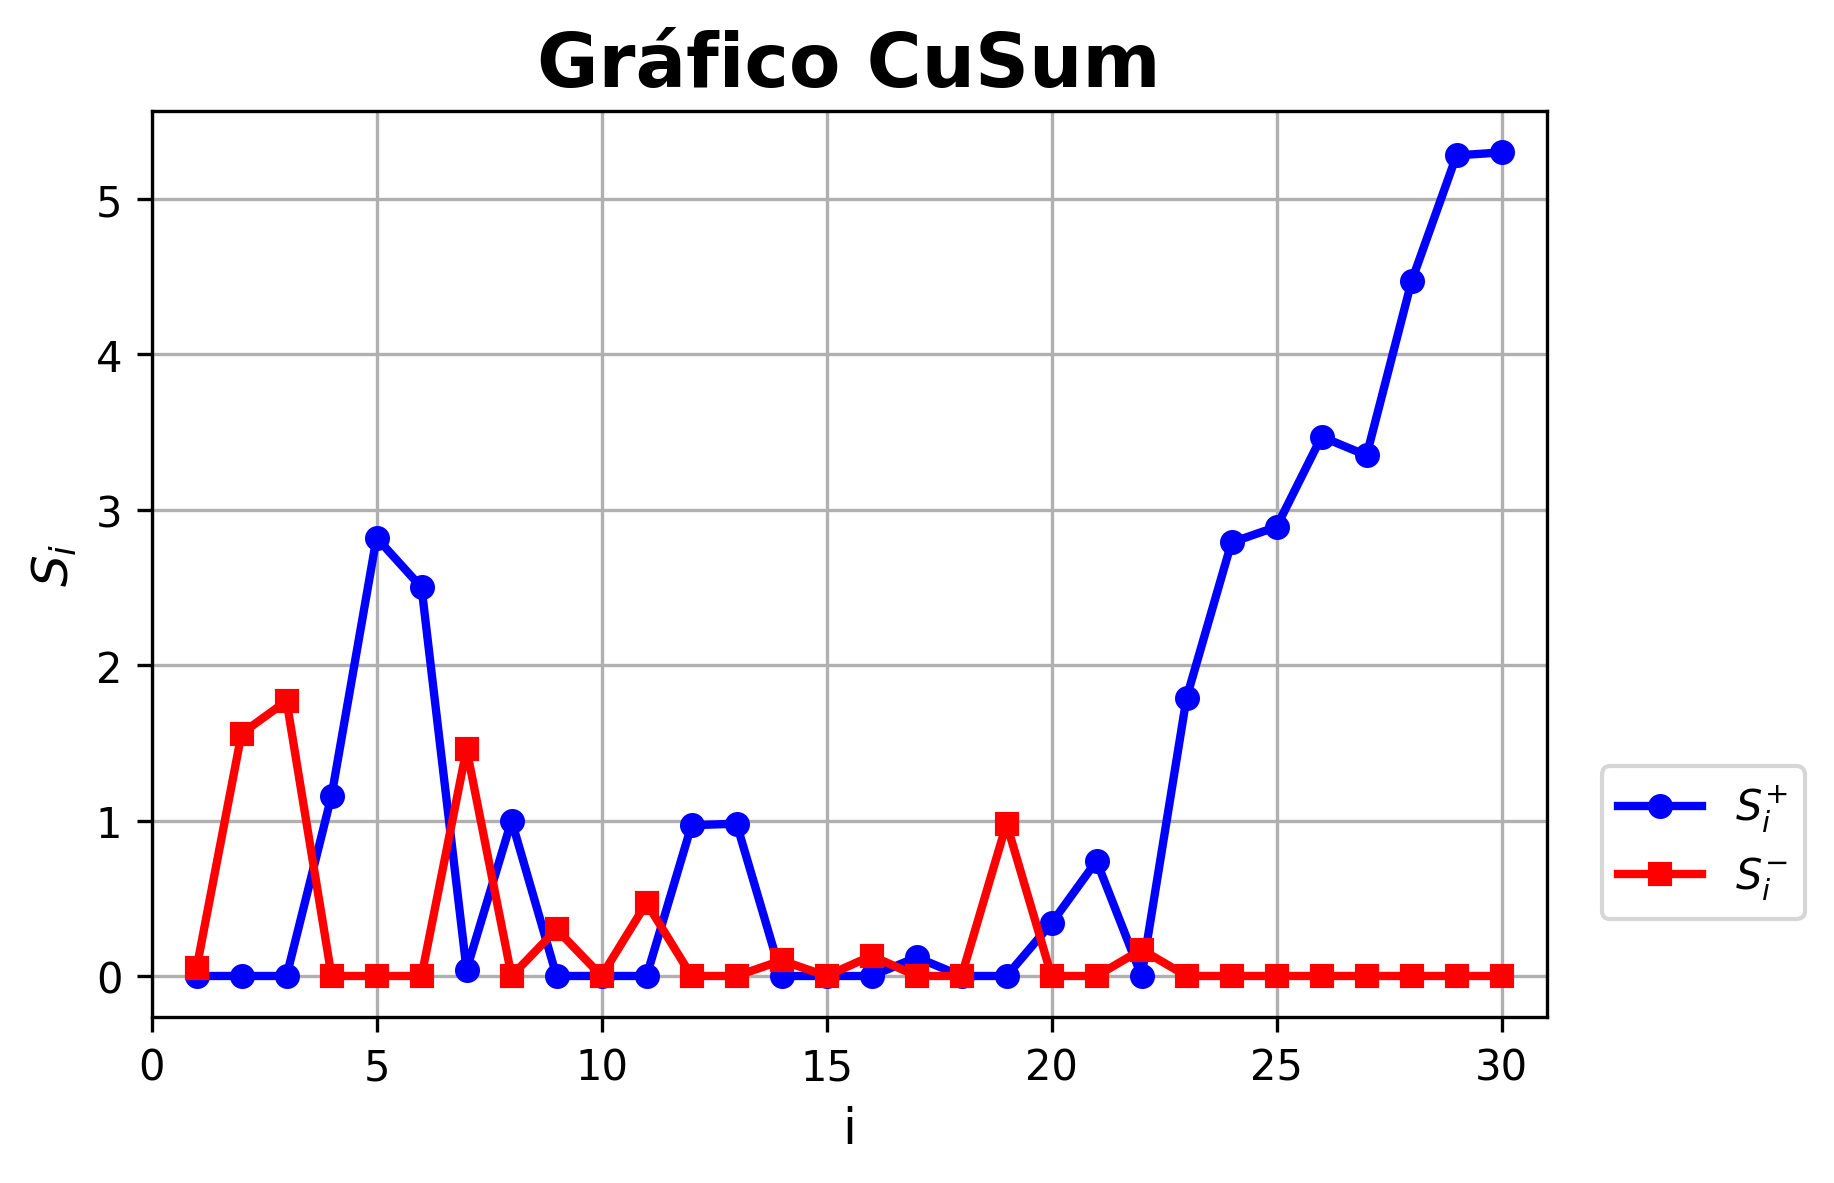

In [ ]:
CuSum['Gráfico']

## Questão 2

Com os mesmos dados trace o gráfico EWMA do slide 27.

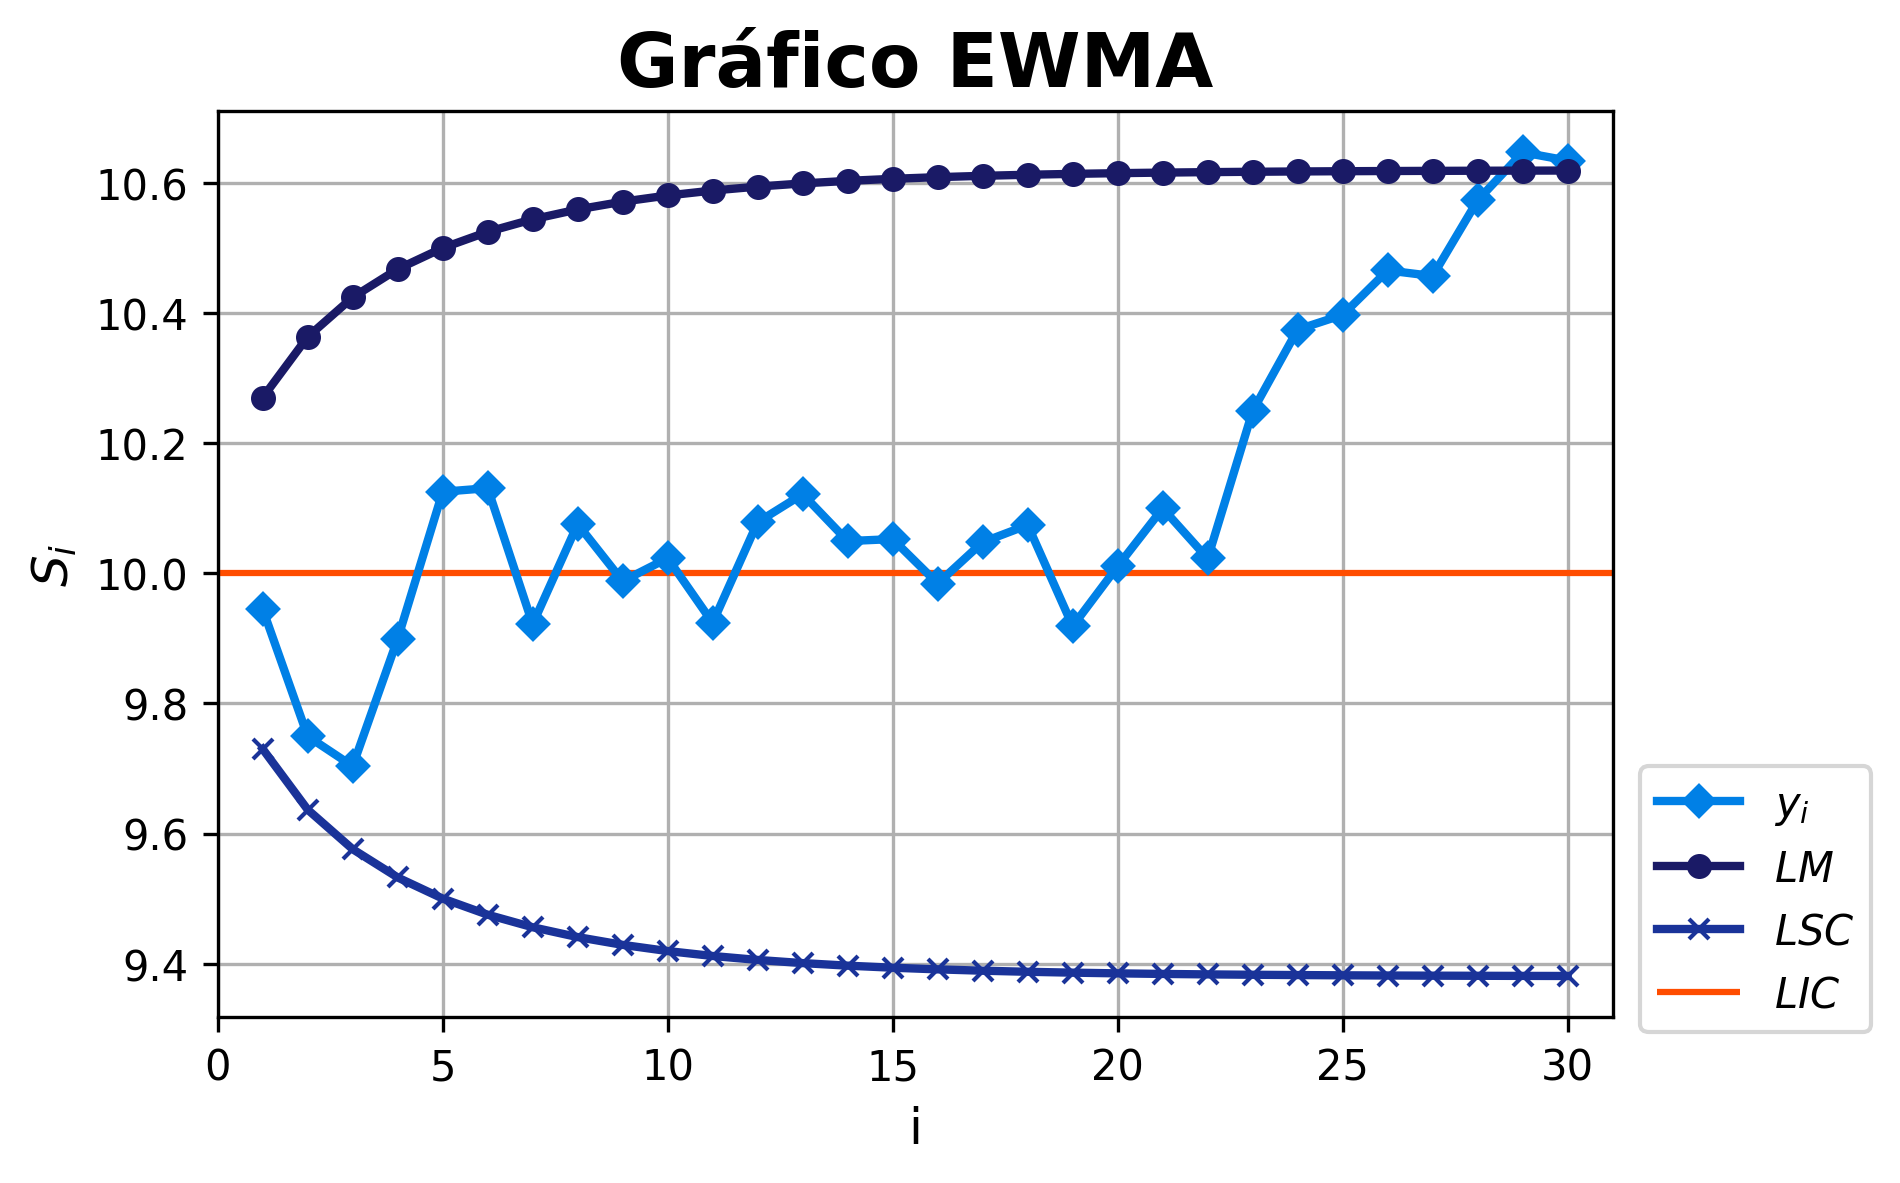

In [ ]:
def EWMA(df, mu, sigma, lamb, k): #Função que constrói o gráfico EWMA de um dataframe.

  # DEFININDO AS VARÍAVEIS

  import pandas as pd #Importando a biblioteca que será usada.
  df = pd.DataFrame(data = df) #Armazenando o dataframe.
  mu = float(mu) #Média do processo original.
  sigma = float(sigma) #Desvio padrão do processo.
  lamb = float(lamb) #Parâmetro lambda.
  k = float(k) #Número de desvios padrões.
  y = mu
  LM = mu #Definindo a linha média do processo.

  # ADICIONANDO COLUNAS NO DATAFRAME

  df.insert(loc = 0, column = 'i', value = range(1, len(df) + 1))
  df['yi'] = pd.Series(float)
  df['LSC'] = pd.Series(float)
  df['LIC'] = pd.Series(float)
  
  # ESTRUTURA PARA PREENCHER AS COLUNAS-RECÉM CRIADAS

  i = 1  #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df) + 1:
    y = lamb*df.loc[i - 1, 'xi'] + (1-lamb)*y
    LSC = mu + k*sigma*((lamb/(2 - lamb))*(1-(1-lamb)**(2*i)))**0.5 #Calculando o Limite Superior Central.
    LIC = mu - k*sigma*((lamb/(2 - lamb))*(1-(1-lamb)**(2*i)))**0.5 #Calculando o Limite Inferior Central.
    df.loc[i - 1, 'yi'] = y
    df.loc[i - 1, 'LSC'] = LSC
    df.loc[i - 1, 'LIC'] = LIC
    i += 1

  # CONSTRUINDO O GRÁFICO DE EWMA:

  plt.hlines(LM, xmin = 0, xmax = len(df) + 1, colors = (1, 0.3, 0)) #Adiciona a linha Linha Média do EWMA.
  plt.plot( # Adiciona os valores yi.
    range(1, len(df) + 1),
    df['yi'],
    color = (0, 0.5, 0.9),
    linewidth = 2,
    marker = 'D',
    markerfacecolor = (0, 0.5, 0.9),
    markersize = 5
  )
  plt.plot( # Adiciona a Linha Superior de Controle.
    range(1, len(df) + 1),
    df['LSC'],
    color = (0.1, 0.1, 0.4),
    linewidth = 2,
    marker = 'o',
    markerfacecolor = (0.1, 0.1, 0.4),
    markersize = 5
  )
  plt.plot( # Adiciona a Linha Inferior de Controle.
    range(1, len(df) + 1),
    df['LIC'],
    color = (0.1, 0.2, 0.6),
    linewidth = 2,
    marker = 'x',
    markerfacecolor = (0.1, 0.2, 0.6),
    markersize = 5
  ) 
  plt.legend(['$y_{i}$', '$LM$', '$LSC$', '$LIC$'], loc = 'best', bbox_to_anchor=(1.2, 0.3)) #Adiciona a legenda.
  plt.grid(True)
  plt.title(
    "Gráfico EWMA",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "i",
    fontdict = {
      'family':'DejaVu Sans', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    "$S_{i}$",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_EWMA.png', format='png', dpi=300, bbox_inches='tight')
  plt.close()
  
  graficoEWMA = Image.open('Gráfico_EWMA.png') #Armazena o gráfico de S em uma variável.

  return {'Dataframe': df, 'Gráfico': graficoEWMA}

EWMA = EWMA(df = df['xi'], mu = 10, sigma = 1, lamb = 0.1, k = 2.7)
EWMA['Gráfico'] #Exibe o gráfico de EWMA.